In [1]:
# plotting libraries
import matplotlib
import matplotlib.pyplot as plt 
# numpy (math) libary
import numpy as np

from scipy import interpolate

path1 = '../../../data/2017_12_22/'
path2 = '../../../data/2018_01_10/'

In [2]:
cy20_1 = np.loadtxt(path1+'1706-VOA_sweep_20cy.tsv') # 1552.38 +- 0.01 nm # 0.35:161:0.75 # 100 ms
cy20_2 = np.loadtxt(path1+'1727-VOA_sweep_20cy.tsv') # 1552.30 +- 0.01 nm # 0.30:101:0.55 # 100 ms # 700 uW
cy20_3 = np.loadtxt(path1+'1734-VOA_sweep_20cy.tsv') # 1552.20 +- 0.01 nm # 0.30:041:0.40 # 100 ms # 690 uW

print(cy20_1.shape, '--> %d loops, %d samples per loop' %(6440/161/2, 161*2))
print(cy20_2.shape, '--> %d loops, %d samples per loop' %(4040/101/2, 101*2))
print(cy20_3.shape, '--> %d loops, %d samples per loop' %(1640/41/2, 41*2))
print()

cy10_01 = np.loadtxt(path2+'1434-VOA_sweep-10loops_at393.tsv') # 1552.393 +- 0.002 nm # 0.45:0.90:91 # 100 ms
cy10_02 = np.loadtxt(path2+'1456-VOA_sweep-10loops_at380.tsv') # 1552.380 +- 0.002 nm # 0.43:0.83:81 # 100 ms
cy10_03 = np.loadtxt(path2+'1510-VOA_sweep_10loops_at358.tsv') # 1552.358 +- 0.002 nm # 0.42:0.77:71 # 100 ms
cy10_04 = np.loadtxt(path2+'1521-VOA_sweep_10loops_at339.tsv') # 1552.339 +- 0.002 nm # 0.41:0.72:63 # 100 ms
cy10_05 = np.loadtxt(path2+'1533-VOA_sweep_10loops_at320.tsv') # 1552.320 +- 0.002 nm # 0.40:0.69:59 # 100 ms
cy10_06 = np.loadtxt(path2+'1542-VOA_sweep_10loops_at300.tsv') # 1552.300 +- 0.002 nm # 0.38:0.65:55 # 100 ms
cy10_07 = np.loadtxt(path2+'1615-VOA_sweep_10loops_at392.tsv') # 1552.392 +- 0.02 nm # 0.45:0.90:91 # 100 ms

print(cy10_01.shape, '--> %d loops, %d samples per loop' %(1820/91/2, 91*2))
print(cy10_02.shape, '--> %d loops, %d samples per loop' %(1620/81/2, 81*2))
print(cy10_03.shape, '--> %d loops, %d samples per loop' %(1420/71/2, 71*2))
print(cy10_04.shape, '--> %d loops, %d samples per loop' %(1260/63/2, 63*2))
print(cy10_05.shape, '--> %d loops, %d samples per loop' %(1180/59/2, 59*2))
print(cy10_06.shape, '--> %d loops, %d samples per loop' %(1100/55/2, 55*2))
print(cy10_07.shape, '--> %d loops, %d samples per loop' %(1820/91/2, 91*2))

(6440, 2) --> 20 loops, 322 samples per loop
(4040, 2) --> 20 loops, 202 samples per loop
(1640, 2) --> 20 loops, 82 samples per loop

(1820, 2) --> 10 loops, 182 samples per loop
(1620, 2) --> 10 loops, 162 samples per loop
(1420, 2) --> 10 loops, 142 samples per loop
(1260, 2) --> 10 loops, 126 samples per loop
(1180, 2) --> 10 loops, 118 samples per loop
(1100, 2) --> 10 loops, 110 samples per loop
(1820, 2) --> 10 loops, 182 samples per loop


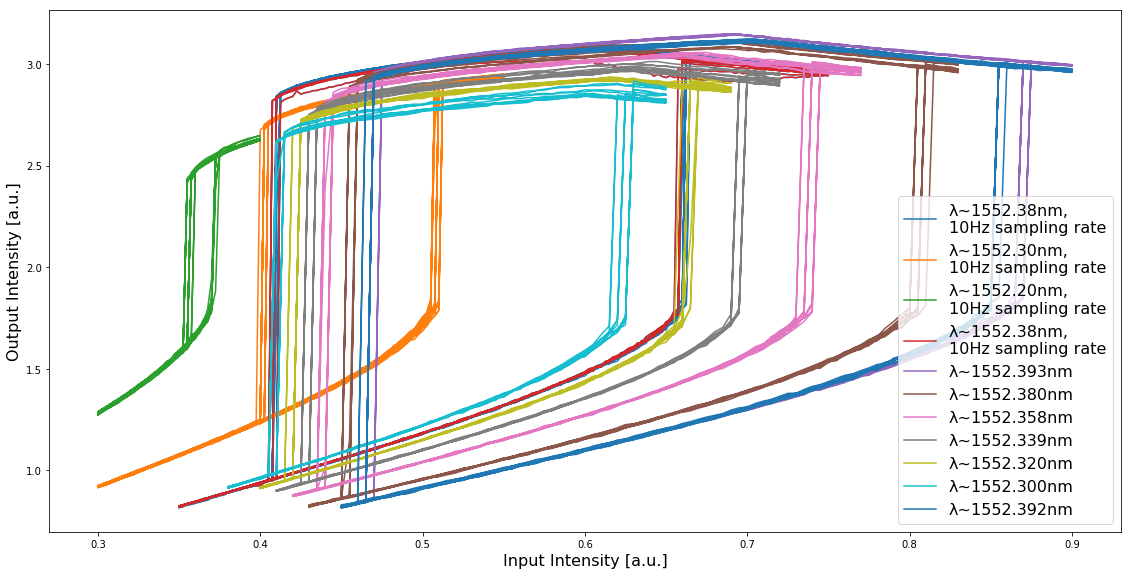

In [3]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

ax1.plot( cy20_1[:,0], cy20_1[:,1], label='λ~1552.38nm,\n10Hz sampling rate')
ax1.plot( cy20_2[:,0], cy20_2[:,1], label='λ~1552.30nm,\n10Hz sampling rate')
ax1.plot( cy20_3[:,0], cy20_3[:,1], label='λ~1552.20nm,\n10Hz sampling rate')

################## !!! ---- !!! #####################
###                                               ###
###    cut last 1/4 of data from the first run    ###
###      due to lab door opened: the measure      ###
###         was not anymore under control         ###
###                                               ###
################## !!! ---- !!! #####################
nn = 15
mm = 161*2
ax1.plot( cy20_1[mm*(nn):,0], cy20_1[mm*(nn):,1], label='λ~1552.38nm,\n10Hz sampling rate')

ax1.plot( cy10_01[:,0], cy10_01[:,1], label='λ~1552.393nm')
ax1.plot( cy10_02[:,0], cy10_02[:,1], label='λ~1552.380nm')
ax1.plot( cy10_03[:,0], cy10_03[:,1], label='λ~1552.358nm')
ax1.plot( cy10_04[:,0], cy10_04[:,1], label='λ~1552.339nm')
ax1.plot( cy10_05[:,0], cy10_05[:,1], label='λ~1552.320nm')
ax1.plot( cy10_06[:,0], cy10_06[:,1], label='λ~1552.300nm')
ax1.plot( cy10_07[:,0], cy10_07[:,1], label='λ~1552.392nm')

ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity [a.u.]', fontsize = 16)
legend = ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

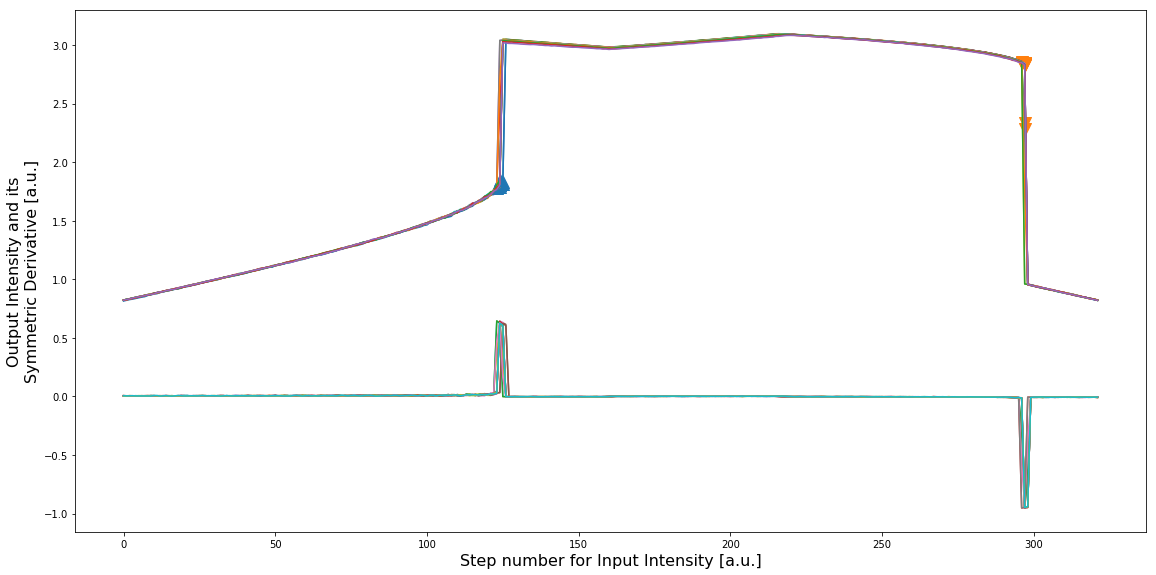

In [4]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

cc = plt.rcParams['axes.prop_cycle'].by_key()['color']

datax = cy20_1[:322*15,0]
datay = cy20_1[:322*15,1]
temp = np.transpose(datay.reshape(15,322))

ax1.plot(temp[:,:], label='λ~1552.38nm,\n10Hz sampling rate')
ax1.plot(np.gradient(temp,axis=0), label='λ~1552.38nm,\n10Hz sampling rate')

idx1 = np.argmax(np.diff(temp, axis=0), axis=0)
ax1.scatter(idx1, temp[idx1,range(15)], marker='^', s=12**2)
    
idx2 = np.argmin(np.diff(temp, axis=0), axis=0)
ax1.scatter(idx2, temp[idx2,range(15)], marker='v', s=12**2)

#ax1.plot(cy20_2[:1000,1], label='λ~1552.30nm,\n10Hz sampling rate')
#ax1.plot(cy20_3[:1000,1], label='λ~1552.20nm,\n10Hz sampling rate')

ax1.set_xlabel('Step number for Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)
#ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

In [5]:
def loop_stat(datax, datay, loops, ppl):
    # transform data in more suitable shape
    mdatax = np.transpose( datax.reshape(loops, ppl) )
    mdatay = np.transpose( datay.reshape(loops, ppl) )
    
    # calculare finite difference, or gradient
    #dif_datay = np.gradient(mdatay, axis=0)
    dif_datay = np.diff(mdatay, axis=0)
    
    # find maxima and minima, i.e. upper and lower bistability limits
    mdatay_max = np.argmax(dif_datay, axis=0)
    mdatay_min = np.argmin(dif_datay, axis=0)
    
    # return reshaped data (1,2) and bistability limits (3,4)
    return mdatax, mdatay, mdatay_max, mdatay_min

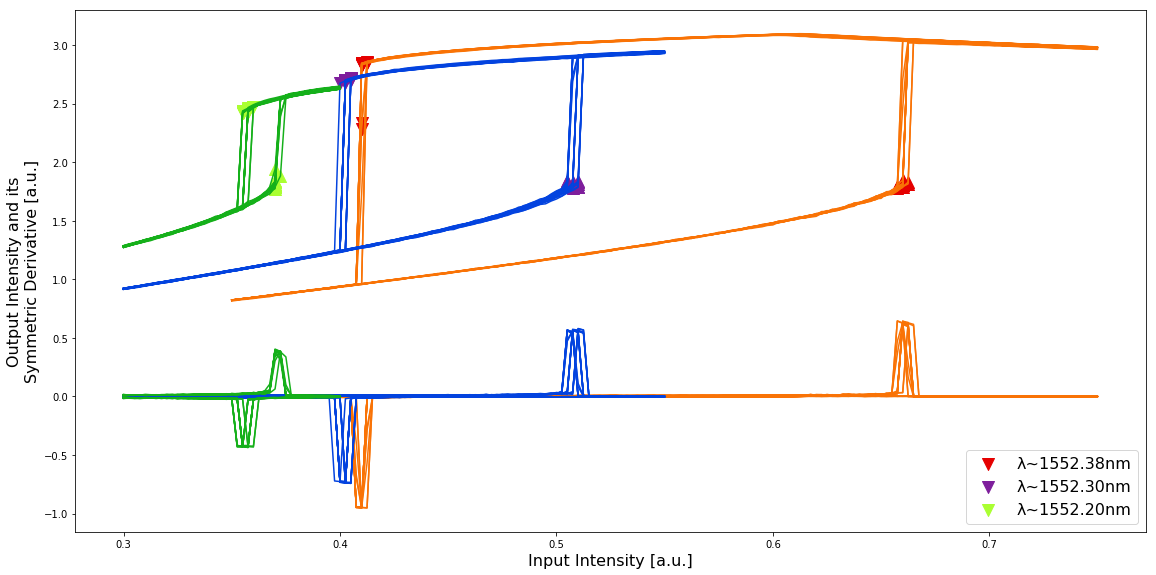

In [6]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

#ax1.set_prop_cycle('color',plt.cm.Blues(np.linspace(0.5,1,15)))

# cy20_1, λ~1552.38 nm, 2*161  samples/loop

s1dx, s1dy, s1iM, s1im = loop_stat(cy20_1[:322*15,0], cy20_1[:322*15,1], 15, 322)

ax1.plot(s1dx, s1dy, c='xkcd:orange' )
ax1.plot(s1dx, np.gradient(s1dy, axis=0), c='xkcd:orange' )
ax1.scatter(s1dx[s1iM,range(15)], s1dy[s1iM,range(15)], marker='^', s=12**2, c='xkcd:red' )
ax1.scatter(s1dx[s1im,range(15)], s1dy[s1im,range(15)], marker='v', s=12**2, c='xkcd:red', label='λ~1552.38nm' )

# cy20_2, λ~1552.30 nm, 2*101  samples/loop

s2dx, s2dy, s2iM, s2im = loop_stat(cy20_2[:202*20,0], cy20_2[:202*20,1], 20, 202)

ax1.plot(s2dx, s2dy, c='xkcd:blue' )
ax1.plot(s2dx, np.gradient(s2dy, axis=0), c='xkcd:blue' )
ax1.scatter(s2dx[s2iM,range(20)], s2dy[s2iM,range(20)], marker='^', s=12**2, c='xkcd:purple' )
ax1.scatter(s2dx[s2im,range(20)], s2dy[s2im,range(20)], marker='v', s=12**2, c='xkcd:purple', label='λ~1552.30nm' )

# cy20_3, λ~1552.20 nm, 2*41 samples/loop

s3dx, s3dy, s3iM, s3im = loop_stat(cy20_3[:82*20,0], cy20_3[:82*20,1], 20, 82)

ax1.plot(s3dx, s3dy, c='xkcd:green' )
ax1.plot(s3dx, np.gradient(s3dy, axis=0), c='xkcd:green' )
ax1.scatter(s3dx[s3iM,range(20)], s3dy[s3iM,range(20)], marker='^', s=12**2, c='xkcd:lime' )
ax1.scatter(s3dx[s3im,range(20)], s3dy[s3im,range(20)], marker='v', s=12**2, c='xkcd:lime', label='λ~1552.20nm' )

#####
ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)
ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

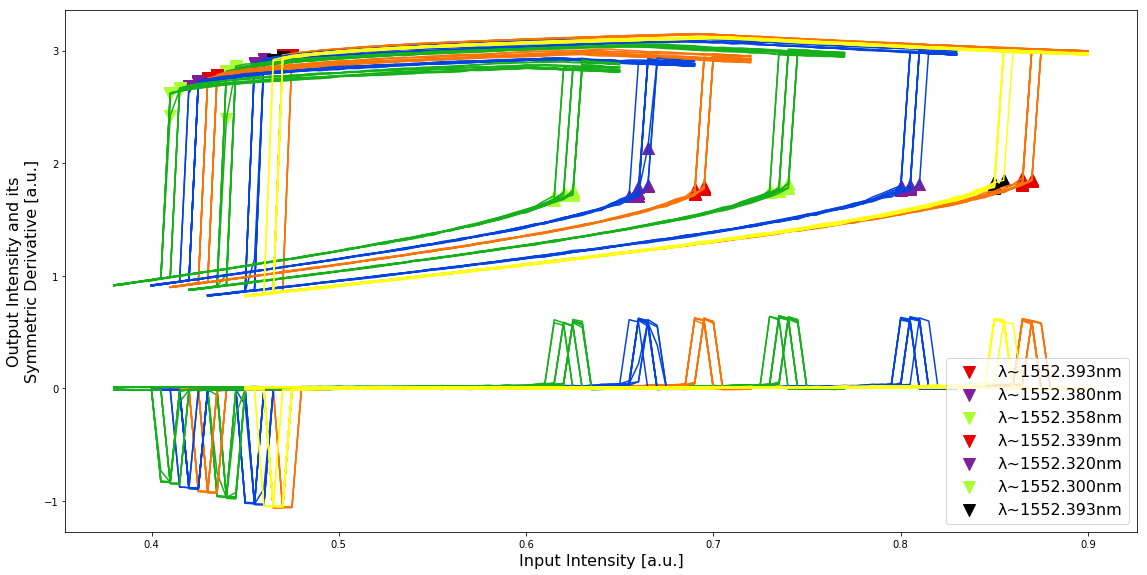

In [11]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

# cy10_01, λ~1552.393 nm, 2*91  samples/loop
r01dx, r01dy, r01iM, r01im = loop_stat(cy10_01[:182*10,0], cy10_01[:182*10,1], 10, 182)

ax1.plot(r01dx, r01dy, c='xkcd:orange' )
ax1.plot(r01dx, np.gradient(r01dy, axis=0), c='xkcd:orange' )
ax1.scatter(r01dx[r01iM,range(10)], r01dy[r01iM,range(10)], marker='^', s=12**2, c='xkcd:red' )
ax1.scatter(r01dx[r01im,range(10)], r01dy[r01im,range(10)], marker='v', s=12**2, c='xkcd:red', label='λ~1552.393nm' )

# cy10_02, λ~1552.38 nm, 2*81  samples/loop
r02dx, r02dy, r02iM, r02im = loop_stat(cy10_02[:162*10,0], cy10_02[:162*10,1], 10, 162)

ax1.plot(r02dx, r02dy, c='xkcd:blue' )
ax1.plot(r02dx, np.gradient(r02dy, axis=0), c='xkcd:blue' )
ax1.scatter(r02dx[r02iM,range(10)], r02dy[r02iM,range(10)], marker='^', s=12**2, c='xkcd:purple' )
ax1.scatter(r02dx[r02im,range(10)], r02dy[r02im,range(10)], marker='v', s=12**2, c='xkcd:purple', label='λ~1552.380nm' )

# cy10_03, λ~1552.358 nm, 2*71  samples/loop
r03dx, r03dy, r03iM, r03im = loop_stat(cy10_03[:142*10,0], cy10_03[:142*10,1], 10, 142)

ax1.plot(   r03dx,                  r03dy, c='xkcd:green' )
ax1.plot(   r03dx, np.gradient(     r03dy, axis=0), c='xkcd:green' )
ax1.scatter(r03dx[r03iM,range(10)], r03dy[r03iM,range(10)], marker='^', s=12**2, c='xkcd:lime' )
ax1.scatter(r03dx[r03im,range(10)], r03dy[r03im,range(10)], marker='v', s=12**2, c='xkcd:lime', label='λ~1552.358nm' )

# cy10_04, λ~1552.339 nm, 2*63  samples/loop
r04dx, r04dy, r04iM, r04im = loop_stat(cy10_04[:126*10,0], cy10_04[:126*10,1], 10, 126)

ax1.plot(   r04dx,                  r04dy, c='xkcd:orange' )
ax1.plot(   r04dx, np.gradient(     r04dy, axis=0), c='xkcd:orange' )
ax1.scatter(r04dx[r04iM,range(10)], r04dy[r04iM,range(10)], marker='^', s=12**2, c='xkcd:red' )
ax1.scatter(r04dx[r04im,range(10)], r04dy[r04im,range(10)], marker='v', s=12**2, c='xkcd:red', label='λ~1552.339nm' )

# cy10_05, λ~1552.320 nm, 2*59  samples/loop
r05dx, r05dy, r05iM, r05im = loop_stat(cy10_05[:118*10,0], cy10_05[:118*10,1], 10, 118)

ax1.plot(r05dx, r05dy, c='xkcd:blue' )
ax1.plot(r05dx, np.gradient(r05dy, axis=0), c='xkcd:blue' )
ax1.scatter(r05dx[r05iM,range(10)], r05dy[r05iM,range(10)], marker='^', s=12**2, c='xkcd:purple' )
ax1.scatter(r05dx[r05im,range(10)], r05dy[r05im,range(10)], marker='v', s=12**2, c='xkcd:purple', label='λ~1552.320nm' )

# cy10_06, λ~1552.300 nm, 2*55  samples/loop
r06dx, r06dy, r06iM, r06im = loop_stat(cy10_06[:110*10,0], cy10_06[:110*10,1], 10, 110)

ax1.plot(   r06dx,                  r06dy, c='xkcd:green' )
ax1.plot(   r06dx, np.gradient(     r06dy, axis=0), c='xkcd:green' )
ax1.scatter(r06dx[r06iM,range(10)], r06dy[r06iM,range(10)], marker='^', s=12**2, c='xkcd:lime' )
ax1.scatter(r06dx[r06im,range(10)], r06dy[r06im,range(10)], marker='v', s=12**2, c='xkcd:lime', label='λ~1552.300nm' )

# cy10_07, λ~1552.392 nm, 2*91  samples/loop
r07dx, r07dy, r07iM, r07im = loop_stat(cy10_07[:182*10,0], cy10_07[:182*10,1], 10, 182)

ax1.plot(   r07dx,                  r07dy, c='xkcd:yellow' )
ax1.plot(   r07dx, np.gradient(     r07dy, axis=0), c='xkcd:yellow' )
ax1.scatter(r07dx[r07iM,range(10)], r07dy[r07iM,range(10)], marker='^', s=12**2, c='xkcd:black' )
ax1.scatter(r07dx[r07im,range(10)], r07dy[r07im,range(10)], marker='v', s=12**2, c='xkcd:black', label='λ~1552.393nm' )


#####
ax1.set_xlabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_ylabel('Output Intensity and its\nSymmetric Derivative [a.u.]', fontsize = 16)
ax1.legend(loc=4, fontsize=16)

plt.show()
plt.close()

In [8]:
print('λ~1552.38nm')
print('max %.3f'%np.mean(s1dx[s1iM,range(15)]), ' ± %.4f'%np.std(s1dx[s1iM,range(15)]) )
print('min %.3f'%np.mean(s1dx[s1im,range(15)]), ' ± %.4f'%np.std(s1dx[s1im,range(15)]) )
print('λ~1552.30nm')
print('max %.3f'%np.mean(s2dx[s2iM,range(20)]), ' ± %.4f'%np.std(s2dx[s2iM,range(20)]) )
print('min %.3f'%np.mean(s2dx[s2im,range(20)]), ' ± %.4f'%np.std(s2dx[s2im,range(20)]) )
print('λ~1552.20nm')
print('max %.3f'%np.mean(s3dx[s3iM,range(20)]), ' ± %.4f'%np.std(s3dx[s3iM,range(20)]) )
print('min %.3f'%np.mean(s3dx[s3im,range(20)]), ' ± %.4f'%np.std(s3dx[s3im,range(20)]) )

print()
print('max and min are the upper and lower limits of the bistability regime')
print('the values in the x axis are given by the input power, times the transparency ∈[0,1]')

print('\nrun 2')
print('λ~1552.393nm')
print('max %.3f'%np.mean(r01dx[r01iM,range(10)]), ' ± %.4f'%np.std(r01dx[r01iM,range(10)]) )
print('min %.3f'%np.mean(r01dx[r01im,range(10)]), ' ± %.4f'%np.std(r01dx[r01im,range(10)]) )
print('λ~1552.380nm')
print('max %.3f'%np.mean(r02dx[r02iM,range(10)]), ' ± %.4f'%np.std(r02dx[r02iM,range(10)]) )
print('min %.3f'%np.mean(r02dx[r02im,range(10)]), ' ± %.4f'%np.std(r02dx[r02im,range(10)]) )
print('λ~1552.358nm')
print('max %.3f'%np.mean(r03dx[r03iM,range(10)]), ' ± %.4f'%np.std(r03dx[r03iM,range(10)]) )
print('min %.3f'%np.mean(r03dx[r03im,range(10)]), ' ± %.4f'%np.std(r03dx[r03im,range(10)]) )
print('λ~1552.339nm')
print('max %.3f'%np.mean(r04dx[r04iM,range(10)]), ' ± %.4f'%np.std(r04dx[r04iM,range(10)]) )
print('min %.3f'%np.mean(r04dx[r04im,range(10)]), ' ± %.4f'%np.std(r04dx[r04im,range(10)]) )
print('λ~1552.320nm')
print('max %.3f'%np.mean(r05dx[r05iM,range(10)]), ' ± %.4f'%np.std(r05dx[r05iM,range(10)]) )
print('min %.3f'%np.mean(r05dx[r05im,range(10)]), ' ± %.4f'%np.std(r05dx[r05im,range(10)]) )
print('λ~1552.300nm')
print('max %.3f'%np.mean(r06dx[r06iM,range(10)]), ' ± %.4f'%np.std(r06dx[r06iM,range(10)]) )
print('min %.3f'%np.mean(r06dx[r06im,range(10)]), ' ± %.4f'%np.std(r06dx[r06im,range(10)]) )
print('λ~1552.392nm')
print('max %.3f'%np.mean(r07dx[r07iM,range(10)]), ' ± %.4f'%np.std(r07dx[r07iM,range(10)]) )
print('min %.3f'%np.mean(r07dx[r07im,range(10)]), ' ± %.4f'%np.std(r07dx[r07im,range(10)]) )

λ~1552.38nm
max 0.660  ± 0.0015
min 0.410  ± 0.0010
λ~1552.30nm
max 0.507  ± 0.0020
min 0.403  ± 0.0013
λ~1552.20nm
max 0.370  ± 0.0005
min 0.357  ± 0.0015

max and min are the upper and lower limits of the bistability regime
the values in the x axis are given by the input power, times the transparency ∈[0,1]

run 2
λ~1552.393nm
max 0.867  ± 0.0024
min 0.471  ± 0.0023
λ~1552.380nm
max 0.803  ± 0.0032
min 0.458  ± 0.0025
λ~1552.358nm
max 0.736  ± 0.0037
min 0.443  ± 0.0025
λ~1552.339nm
max 0.693  ± 0.0025
min 0.432  ± 0.0025
λ~1552.320nm
max 0.661  ± 0.0030
min 0.424  ± 0.0020
λ~1552.300nm
max 0.621  ± 0.0039
min 0.412  ± 0.0024
λ~1552.392nm
max 0.850  ± 0.0015
min 0.469  ± 0.0020


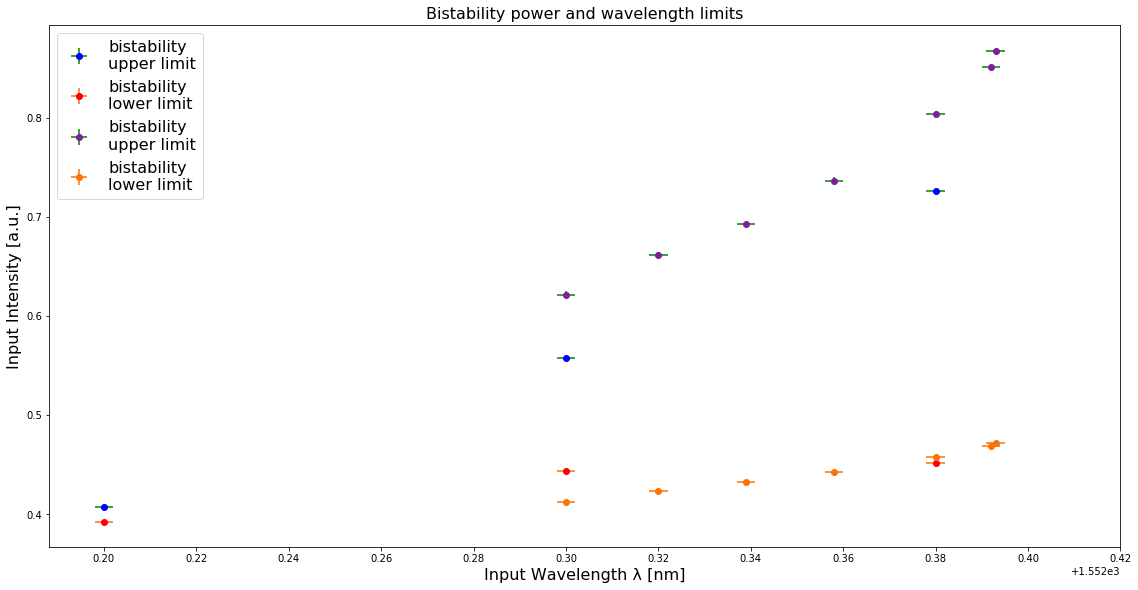

In [9]:
fig = plt.figure(figsize=(3*6.4, 2*4.8)) # default = 6.4, 4.8
ax1 = fig.add_subplot(111)

x = [1552.38, 1552.30, 1552.20]
xerr = 3*[0.002]

k=1.1
ymax = [k*np.mean(s1dx[s1iM,range(15)]), k*np.mean(s2dx[s2iM,range(20)]), k*np.mean(s3dx[s3iM,range(20)])]
ymaxerr = [np.std(s1dx[s1iM,range(15)]), np.std(s2dx[s2iM,range(20)]), np.std(s3dx[s3iM,range(20)])]

ymin = [k*np.mean(s1dx[s1im,range(15)]), k*np.mean(s2dx[s2im,range(20)]), k*np.mean(s3dx[s3im,range(20)])]
yminerr = [np.std(s1dx[s1im,range(15)]), np.std(s2dx[s2im,range(20)]), np.std(s3dx[s3im,range(20)])]

x2 = [1552.393, 1552.380, 1552.358, 1552.339, 1552.320, 1552.300, 1552.392]
xerr2 = 7*[0.002]

ymax2   = [np.mean(r01dx[r01iM,range(10)]), np.mean(r02dx[r02iM,range(10)]), np.mean(r03dx[r03iM,range(10)]),#
           np.mean(r04dx[r04iM,range(10)]), np.mean(r05dx[r05iM,range(10)]), np.mean(r06dx[r06iM,range(10)]),#
           np.mean(r07dx[r07iM,range(10)])#
          ]
ymaxerr2= [np.std(r01dx[r01iM,range(10)]), np.std(r02dx[r02iM,range(10)]), np.std(r03dx[r03iM,range(10)]),#
           np.std(r04dx[r04iM,range(10)]), np.std(r05dx[r05iM,range(10)]), np.std(r06dx[r06iM,range(10)]),#
           np.std(r07dx[r07iM,range(10)])#
          ]

ymin2   = [np.mean(r01dx[r01im,range(10)]), np.mean(r02dx[r02im,range(10)]), np.mean(r03dx[r03im,range(10)]),#
           np.mean(r04dx[r04im,range(10)]), np.mean(r05dx[r05im,range(10)]), np.mean(r06dx[r06im,range(10)]),#
           np.mean(r07dx[r07im,range(10)])#
          ]
yminerr2= [np.std(r01dx[r01im,range(10)]), np.std(r02dx[r02im,range(10)]), np.std(r03dx[r03im,range(10)]),#
           np.std(r04dx[r04im,range(10)]), np.std(r05dx[r05im,range(10)]), np.std(r06dx[r06im,range(10)]),#
           np.std(r07dx[r07im,range(10)])#
          ]

ax1.errorbar(x, ymax, yerr=ymaxerr, xerr=xerr, fmt='o', c='b', ecolor='g', capthick=2,
             label='bistability\nupper limit')
ax1.errorbar(x, ymin, yerr=yminerr, xerr=xerr, fmt='o', c='r', ecolor='xkcd:orange', capthick=2,
             label='bistability\nlower limit')

ax1.errorbar(x2, ymax2, yerr=ymaxerr2, xerr=xerr2, fmt='o', c='xkcd:purple', ecolor='g', capthick=2,
             label='bistability\nupper limit')
ax1.errorbar(x2, ymin2, yerr=yminerr2, xerr=xerr2, fmt='o', c='xkcd:orange', ecolor='xkcd:orange', capthick=2,
             label='bistability\nlower limit')

ax1.set_title(r'Bistability power and wavelength limits', fontsize = 16)
ax1.set_ylabel('Input Intensity [a.u.]', fontsize = 16)
ax1.set_xlabel('Input Wavelength λ [nm]', fontsize = 16)
ax1.legend(loc=2, fontsize=16)

plt.xticks( np.arange(1552.2,1552.42,0.02) )

plt.show()
plt.close()